Accuracy: 0.8265428256810456
Classification Report:
              precision    recall  f1-score   support

          -1       0.84      0.63      0.72      4473
           0       0.81      0.92      0.86      7404
           1       0.84      0.85      0.84      9010

    accuracy                           0.83     20887
   macro avg       0.83      0.80      0.81     20887
weighted avg       0.83      0.83      0.82     20887

Confusion Matrix:
[[2813  642 1018]
 [ 149 6787  468]
 [ 375  971 7664]]


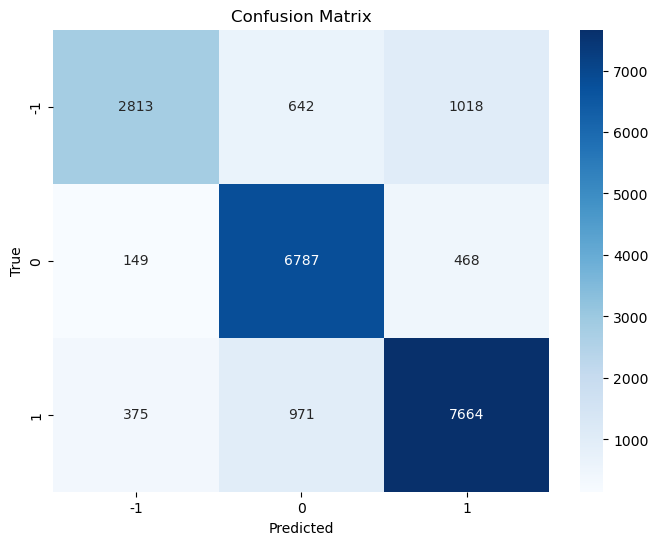

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
bjp_data = pd.read_csv('bjp_final.csv')

# Replace NaN values in 'clean_text' column with an empty string
bjp_data['clean_text'] = bjp_data['clean_text'].fillna('')

# Split the data into features (X) and labels (y)
X = bjp_data['clean_text']
y = bjp_data['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Choose a machine learning model (Random Forest)
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}\nClassification Report:\n{report}\nConfusion Matrix:\n{conf_matrix}')

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy: 0.7119341563786008
Classification Report:
              precision    recall  f1-score   support

          -1       0.74      0.34      0.47       246
           0       0.68      0.81      0.74       406
           1       0.73      0.81      0.77       563

    accuracy                           0.71      1215
   macro avg       0.72      0.65      0.66      1215
weighted avg       0.72      0.71      0.70      1215

Confusion Matrix:
[[ 84  67  95]
 [  8 327  71]
 [ 21  88 454]]


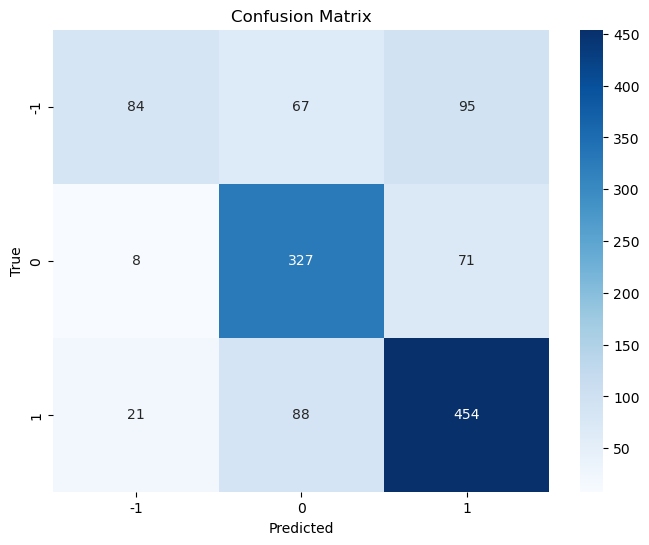

In [5]:
# Load data
cong_data = pd.read_csv('congress_final.csv')

# Replace NaN values in 'clean_text' column with an empty string
cong_data['clean_text'] = cong_data['clean_text'].fillna('')

# Split the data into features (X) and labels (y)
X = cong_data['clean_text']
y = cong_data['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Choose a machine learning model (Random Forest)
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}\nClassification Report:\n{report}\nConfusion Matrix:\n{conf_matrix}')

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
